<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/EDA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading data into dataframe
application_data = pd.read_csv("application_data.csv")
#Look into first 5 rows of data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Shape of datafram
application_data.shape

(19395, 122)

In [ ]:
#Inspecting null values
missing_application_data = application_data.isnull().sum()
print(missing_application_data)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     2608
AMT_REQ_CREDIT_BUREAU_WEEK    2608
AMT_REQ_CREDIT_BUREAU_MON     2608
AMT_REQ_CREDIT_BUREAU_QRT     2608
AMT_REQ_CREDIT_BUREAU_YEAR    2608
Length: 122, dtype: int64


In [ ]:
#Filtring out columns which has null values greater than 40%
column_missing_percent = missing_application_data / len(application_data)
columns_to_drop = column_missing_percent[column_missing_percent > 0.4].index.values
application_data.drop(columns = columns_to_drop)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19390,122616,0,Cash loans,F,Y,Y,0,180000.0,237024.0,12231.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
19391,122618,0,Cash loans,F,N,Y,0,135000.0,781920.0,25969.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19392,122619,0,Cash loans,F,N,Y,1,90000.0,454500.0,19237.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
19393,122620,0,Revolving loans,F,N,Y,1,45000.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#columns in which missing value is less than 15%
column_missing_percent = missing_application_data / len(application_data)
columns = column_missing_percent[column_missing_percent < 0.15].index.values
columns

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_C

In [ ]:
#Checking out number of nulls in loan amount
rows_to_drop = application_data[application_data['AMT_ANNUITY'].isnull()].index
#Result shows there are 8 rows having amt_annuity as null.

#Dropping these rows
application_data.drop(rows_to_drop, inplace=True)

In [ ]:
#Imputing amt_income_total with the mean of the column data
application_data['AMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL'].fillna(application_data['AMT_INCOME_TOTAL'].mean())
#Imputing flag_own_car with the mode of the column data
application_data['FLAG_OWN_CAR'] = application_data['FLAG_OWN_CAR'].fillna(application_data['FLAG_OWN_CAR'].mode())


In [ ]:
#Statistics for the amt_annuity

#Mean
print("Mean : ", application_data['AMT_ANNUITY'].mean())

#Median
print("Median : ", application_data['AMT_ANNUITY'].median())


Mean :  27108.573909183444
Median :  24903.0


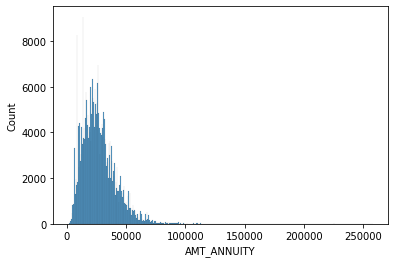

In [ ]:
sns.histplot(data=application_data, x="AMT_ANNUITY")

In [ ]:
#Find out maximum AMT_ANNUITY
application_data['AMT_ANNUITY'].max()
#From the above graph, it can be verified that it is a long tail distribution
#with max AMT_ANNUITY as 258025.2

258025.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


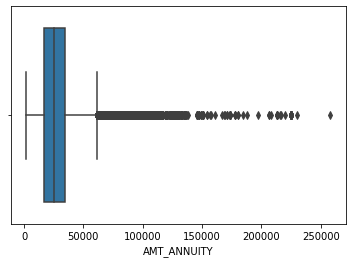

In [ ]:
#Boxplot for AMT_ANNUITY
sns.boxplot(application_data['AMT_ANNUITY'])
#There seems to have outliers in the right

In [ ]:
#Finding the number of outliers
q1 = application_data['AMT_ANNUITY'].quantile(0.25)
q3 = application_data['AMT_ANNUITY'].quantile(0.75)
iqr = q3 - q1
iqr
#IQR for AMT_ANNUITY is 18090.

#Finding outliers
outlier_count = ((application_data['AMT_ANNUITY'] < (q1 - 1.5 * iqr)) | (application_data['AMT_ANNUITY'] > (q3 + 1.5 * iqr))).sum()
#There are 4126 data points which can be considered as outliers

#Calculation outlier as percentage
(outlier_count / len(application_data))*100
#2.4% of data for amt_annuity is outlier.
#Since outlier lies to the right of the data, therefore mean is greater than median.
#Median gives us a true picture because unlike mean, median does not get affected by outliers.

2.3872131992781647

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


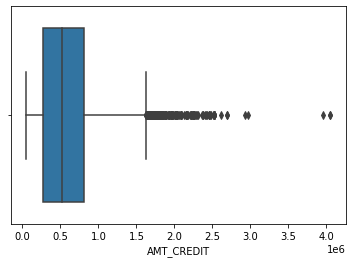

In [ ]:
#Outliers for AMT_CREDIT
#Boxplot for AMT_CREDIT
sns.boxplot(application_data['AMT_CREDIT'])
#There seems to have outliers in the right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


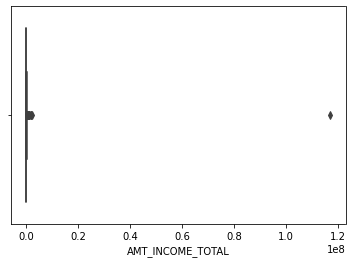

In [ ]:
#Outliers for AMT_INCOME_TOTAL
#Boxplot for AMT_INCOME_TOTAL
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
#There seems to have outliers in the right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


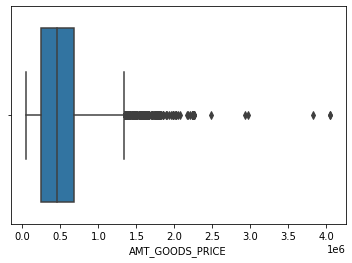

In [ ]:
#Outliers for AMT_GOODS_PRICE
#Boxplot for AMT_GOODS_PRICE
sns.boxplot(application_data['AMT_GOODS_PRICE'])
#There seems to have outliers in the right

In [ ]:
#Checking number of nulls in Target
application_data[application_data['TARGET'].isnull()]

#No nulls in target, hence nothing to drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
#Check how many people are having no problems in repaying their loan
len(application_data[application_data['TARGET'] == 0])
#Calculating it as a percentage
(len(application_data[application_data['TARGET'] == 0])/len(application_data)) * 100
#91.85% people are not having any problems in repaying thier loan.

92.14746068574375

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


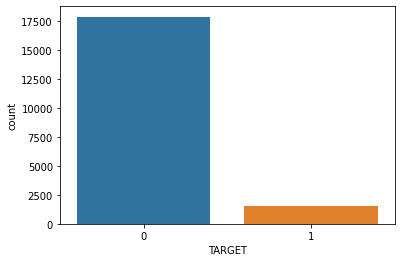

In [ ]:
sns.countplot(application_data['TARGET'])
#Plot shows that 91% people have no problem repaying the loan money

In [ ]:
#All possible values for type of people applying for loan
application_data['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [ ]:
#Percent wise distribution for name_income_type
percent_name_income_type = (application_data['NAME_INCOME_TYPE'].value_counts() / len(application_data)) * 100
percent_name_income_type
#Working class has the highest loan request (51.7%). 
#People with Maternity leave has the lowest (0.0011%)

Working                 52.312452
Commercial associate    23.062645
Pensioner               17.803558
State servant            6.800722
Unemployed               0.010312
Student                  0.010312
Name: NAME_INCOME_TYPE, dtype: float64

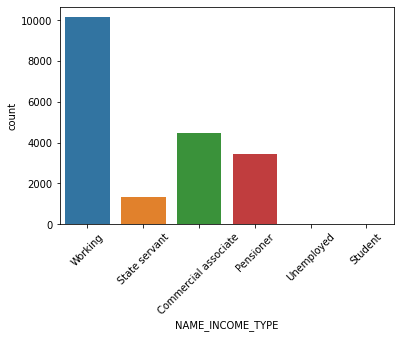

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x="NAME_INCOME_TYPE", data=application_data)
#As can be seen for the data, working class has the highest loan request.

In [ ]:
#Finding correlation for target
print(application_data.corr(method ='pearson')['TARGET'])
#Finding parameter with highest corr
target_corr = application_data.corr(method ='pearson')['TARGET']
print(target_corr[target_corr == target_corr[target_corr.index != 'TARGET'].max()])
#TARGET is positvely correlated to DAYS_BIRTH, but it's value is too small
#to conclude anything.
print(target_corr[target_corr == target_corr[target_corr.index != 'TARGET'].min()])
#TARGET is negatively correlated to EXT_3, it's value is too small to conclude anything

SK_ID_CURR                    0.005033
TARGET                        1.000000
CNT_CHILDREN                  0.036887
AMT_INCOME_TOTAL              0.022544
AMT_CREDIT                   -0.031617
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.020299
AMT_REQ_CREDIT_BUREAU_WEEK    0.012576
AMT_REQ_CREDIT_BUREAU_MON    -0.015598
AMT_REQ_CREDIT_BUREAU_QRT     0.002893
AMT_REQ_CREDIT_BUREAU_YEAR    0.023967
Name: TARGET, Length: 106, dtype: float64
DAYS_BIRTH    0.087088
Name: TARGET, dtype: float64
EXT_SOURCE_3   -0.191969
Name: TARGET, dtype: float64


       NAME_INCOME_TYPE  TARGET     0  Percentage
0  Commercial associate       0  4139   92.532976
1  Commercial associate       1   334    7.467024
2             Pensioner       0  3272   94.758181
3             Pensioner       1   181    5.241819
4         State servant       0  1249   94.692949
5         State servant       1    70    5.307051
6               Student       0     2  100.000000
7            Unemployed       0     2  100.000000
8               Working       0  9208   90.754977
9               Working       1   938    9.245023


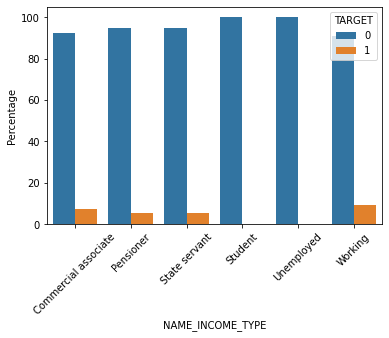

In [ ]:
#Bivariate analysis for TARGET vs NAME_INCOME_TYPE
group_by_income_target = application_data.groupby(["NAME_INCOME_TYPE", "TARGET"]).size().reset_index()
df_temp = group_by_income_target.reset_index().groupby("NAME_INCOME_TYPE")[0].sum()
group_by_income_target["Percentage"] = group_by_income_target.apply(lambda x: (x[0] / df_temp[x["NAME_INCOME_TYPE"]]) * 100, axis=1)
print(group_by_income_target)
plt.xticks(rotation=45)
sns.barplot(data=group_by_income_target, x="NAME_INCOME_TYPE", y="Percentage", hue="TARGET")
#As can be seen by the data, Businessman have 100% success rate in repaying their loan on time,
#whereas unemployed people have some issues while returning the loan.
#This information can useful to decide if loan is to approved or rejected.

             NAME_EDUCATION_TYPE  TARGET      0  Percentage
0                Academic degree       0     11  100.000000
1               Higher education       0   4536   95.294118
2               Higher education       1    224    4.705882
3              Incomplete higher       0    585   90.417311
4              Incomplete higher       1     62    9.582689
5                Lower secondary       0    225   89.641434
6                Lower secondary       1     26   10.358566
7  Secondary / secondary special       0  12515   91.177328
8  Secondary / secondary special       1   1211    8.822672


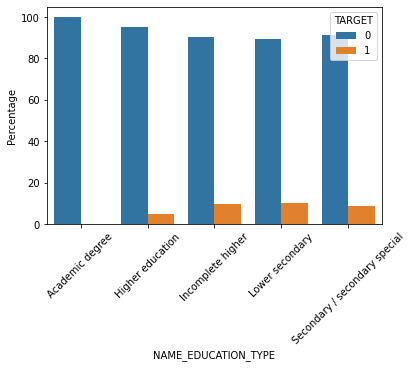

In [ ]:
#Bivariate analysis for TARGET vs NAME_EDUCATION_TYPE
group_by_income_target = application_data.groupby(["NAME_EDUCATION_TYPE", "TARGET"]).size().reset_index()
df_temp = group_by_income_target.reset_index().groupby("NAME_EDUCATION_TYPE")[0].sum()
group_by_income_target["Percentage"] = group_by_income_target.apply(lambda x: (x[0] / df_temp[x["NAME_EDUCATION_TYPE"]]) * 100, axis=1)
print(group_by_income_target)
plt.xticks(rotation=45)
sns.barplot(data=group_by_income_target, x="NAME_EDUCATION_TYPE", y="Percentage", hue="TARGET")


     NAME_FAMILY_STATUS  TARGET      0  Percentage
0        Civil marriage       0   1705   90.643275
1        Civil marriage       1    176    9.356725
2               Married       0  11616   92.720307
3               Married       1    912    7.279693
4             Separated       0   1094   91.166667
5             Separated       1    106    8.833333
6  Single / not married       0   2512   90.262307
7  Single / not married       1    271    9.737693
8                 Widow       0    945   94.217348
9                 Widow       1     58    5.782652


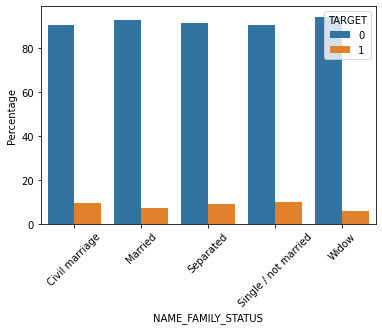

In [ ]:
#Bivariate analysis for TARGET vs NAME_FAMILY_STATUS
group_by_income_target = application_data.groupby(["NAME_FAMILY_STATUS", "TARGET"]).size().reset_index()
df_temp = group_by_income_target.reset_index().groupby("NAME_FAMILY_STATUS")[0].sum()
group_by_income_target["Percentage"] = group_by_income_target.apply(lambda x: (x[0] / df_temp[x["NAME_FAMILY_STATUS"]]) * 100, axis=1)
print(group_by_income_target)
plt.xticks(rotation=45)
sns.barplot(data=group_by_income_target, x="NAME_FAMILY_STATUS", y="Percentage", hue="TARGET")

      NAME_HOUSING_TYPE  TARGET      0  Percentage
0       Co-op apartment       0     72   92.307692
1       Co-op apartment       1      6    7.692308
2     House / apartment       0  15887   92.414636
3     House / apartment       1   1304    7.585364
4   Municipal apartment       0    671   92.297111
5   Municipal apartment       1     56    7.702889
6      Office apartment       0    151   93.788820
7      Office apartment       1     10    6.211180
8      Rented apartment       0    266   88.079470
9      Rented apartment       1     36   11.920530
10         With parents       0    825   88.141026
11         With parents       1    111   11.858974


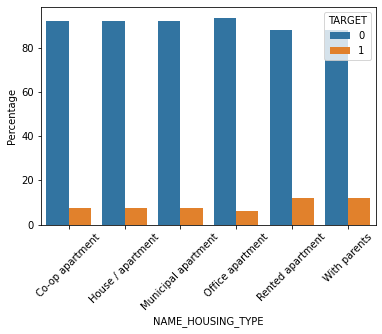

In [ ]:
#Bivariate analysis for TARGET vs NAME_HOUSING_TYPE
group_by_income_target = application_data.groupby(["NAME_HOUSING_TYPE", "TARGET"]).size().reset_index()
df_temp = group_by_income_target.reset_index().groupby("NAME_HOUSING_TYPE")[0].sum()
group_by_income_target["Percentage"] = group_by_income_target.apply(lambda x: (x[0] / df_temp[x["NAME_HOUSING_TYPE"]]) * 100, axis=1)
print(group_by_income_target)
plt.xticks(rotation=45)
sns.barplot(data=group_by_income_target, x="NAME_HOUSING_TYPE", y="Percentage", hue="TARGET")

   REGION_RATING_CLIENT  TARGET      0  Percentage
0                     1       0   1960   95.890411
1                     1       1     84    4.109589
2                     2       0  13240   92.232672
3                     2       1   1115    7.767328
4                     3       0   2672   89.185581
5                     3       1    324   10.814419


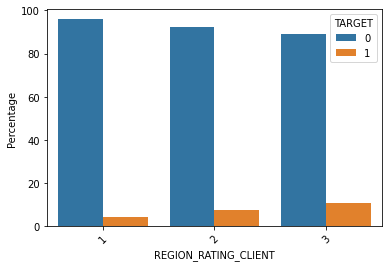

In [ ]:
#Bivariate analysis for TARGET vs REGION_RATING_CLIENT
group_by_income_target = application_data.groupby(["REGION_RATING_CLIENT", "TARGET"]).size().reset_index()
df_temp = group_by_income_target.reset_index().groupby("REGION_RATING_CLIENT")[0].sum()
group_by_income_target["Percentage"] = group_by_income_target.apply(lambda x: (x[0] / df_temp[x["REGION_RATING_CLIENT"]]) * 100, axis=1)
print(group_by_income_target)
plt.xticks(rotation=45)
sns.barplot(data=group_by_income_target, x="REGION_RATING_CLIENT", y="Percentage", hue="TARGET")

  CODE_GENDER  TARGET      0  Percentage
0           F       0  11887   93.304553
1           F       1    853    6.695447
2           M       0   5985   89.932382
3           M       1    670   10.067618


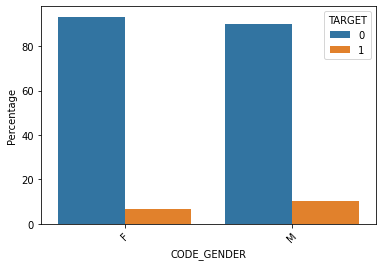

In [ ]:
#Bivariate analysis for TARGET vs CODE_GENDER
group_by_gender_target = application_data.groupby(["CODE_GENDER", "TARGET"]).size().reset_index()
df_temp = group_by_gender_target.reset_index().groupby("CODE_GENDER")[0].sum()
group_by_gender_target["Percentage"] = group_by_gender_target.apply(lambda x: (x[0] / df_temp[x["CODE_GENDER"]]) * 100, axis=1)
print(group_by_gender_target)
plt.xticks(rotation=45)
sns.barplot(data=group_by_gender_target, x="CODE_GENDER", y="Percentage", hue="TARGET")
#Females are having better chances of reapying the loan without any problems.

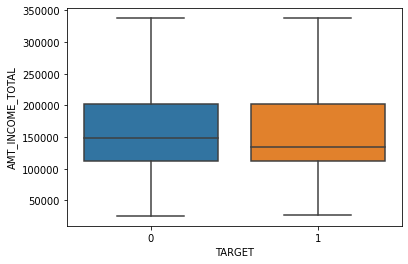

In [ ]:
#Bivariate analysis for TARGET vs AMT_INCOME_TOTAL
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=application_data, showfliers=False)
#People having no problems repaying thier loans are having higher median annual income.

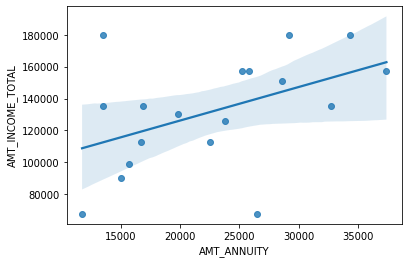

In [ ]:
#Bivariate analysis for AMT_ANNUITY vs AMT_INCOME_TOTAL
non_outlier_data = application_data[~((application_data['AMT_ANNUITY'] < (q1 - 1.5 * iqr)) | (application_data['AMT_ANNUITY'] > (q3 + 1.5 * iqr)))]
q1_income = application_data['AMT_INCOME_TOTAL'].quantile(0.25)
q3_income = application_data['AMT_INCOME_TOTAL'].quantile(0.75)
iqr_income = q3_income - q1_income
non_outlier_data = non_outlier_data[~((non_outlier_data['AMT_INCOME_TOTAL'] < (q1_income - 1.5 * iqr_income)) | (non_outlier_data['AMT_INCOME_TOTAL'] > (q3_income + 1.5 * iqr_income)))]
#Sampling data for better visualization
sns.regplot(x="AMT_ANNUITY", y="AMT_INCOME_TOTAL", data=non_outlier_data.sample(frac=0.0010))
#There is a positive correlation between AMT_ANNUITY and AMT_INCOME_TOTAL. 
#As income increase, loan amount of application also increases

In [ ]:
#Loading previous_application into dataframe
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Inspecting null values
missing_application_data = previous_application.isnull().sum()

In [ ]:
#Filtring out columns which has null values greater than 40%
column_missing_percent = missing_application_data / len(previous_application)
columns_to_drop = column_missing_percent[column_missing_percent > 0.4].index.values
previous_application.drop(columns = columns_to_drop)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,1491628,377001,Consumer loans,NaN,102595.5,102595.5,102595.5,MONDAY,12,Y,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
4192,2369081,416347,Consumer loans,3403.800,32575.5,16825.5,32575.5,SATURDAY,13,Y,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-1001.0,-851.0,-971.0,-965.0,0.0
4193,2454726,389655,Revolving loans,NaN,0.0,0.0,NaN,THURSDAY,11,Y,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
4194,1988248,144757,Cash loans,NaN,0.0,0.0,NaN,SUNDAY,13,Y,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Merging application_data and previous_application on column SK_ID_CURR
merged = application_data.merge(previous_application, on = 'SK_ID_CURR' , how = 'inner')
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100077,0,Cash loans,M,N,Y,0,180000.0,1256400.0,40657.5,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1,100124,0,Cash loans,M,N,Y,0,225000.0,448272.0,28647.0,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-278.0,52.0,-98.0,-94.0,0.0
2,100151,0,Cash loans,M,N,N,0,135000.0,182016.0,11772.0,...,XNA,12.0,high,Cash Street: high,365243.0,-1011.0,-681.0,-681.0,-672.0,1.0
3,100201,0,Cash loans,F,N,Y,1,180000.0,675000.0,36747.0,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-2393.0,-2123.0,-2123.0,-2120.0,0.0
4,100279,0,Cash loans,M,N,Y,0,180000.0,254700.0,16407.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged.shape

(602395, 158)

In [ ]:
merged["NAME_CONTRACT_STATUS"].unique()

array(['Refused', 'Approved', 'Canceled', 'Unused offer'], dtype=object)

In [ ]:
merged["NAME_CONTRACT_STATUS"].value_counts() / len(merged)
#More than 60% applications are apporved for customers having previous records

Approved        0.648045
Refused         0.173184
Canceled        0.162011
Unused offer    0.016760
Name: NAME_CONTRACT_STATUS, dtype: float64

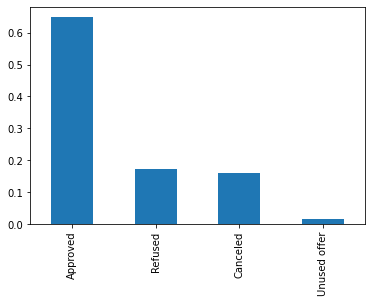

In [ ]:
(merged["NAME_CONTRACT_STATUS"].value_counts() / len(merged)).plot(kind='bar')

In [ ]:
#Bivariate analysis for NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE
pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['NAME_EDUCATION_TYPE'], normalize="columns")
#People with academic degree have high chance of approval and low chance of cancellation
#or refusal according to previous data

NAME_EDUCATION_TYPE,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_CONTRACT_STATUS,,,,
Approved,0.557692,0.666667,1.0,0.682927
Canceled,0.192308,0.000000,0.0,0.154472
Refused,0.250000,0.333333,0.0,0.138211
Unused offer,0.000000,0.000000,0.0,0.024390


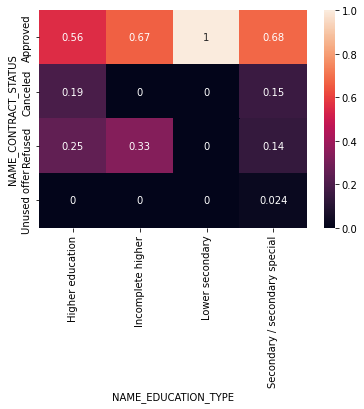

In [ ]:
sns.heatmap(pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['NAME_EDUCATION_TYPE'], normalize='columns'), annot=True)

In [ ]:
#Bivariate analysis for NAME_CONTRACT_STATUS vs FLAG_OWN_CAR
pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['FLAG_OWN_CAR'], normalize="columns")
#Nothing much can be derived from NAME_CONTRACT_STATUS based on car ownership

FLAG_OWN_CAR,N,Y
NAME_CONTRACT_STATUS,,
Approved,0.655172,0.634921
Canceled,0.172414,0.142857
Refused,0.155172,0.206349
Unused offer,0.017241,0.015873


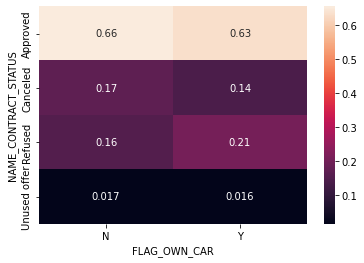

In [ ]:
sns.heatmap(pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['FLAG_OWN_CAR'], normalize='columns'), annot=True)

In [ ]:
pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['TARGET'], normalize="columns")
#People having no problems in repaying the current loans are the ones 
#having more number of approvals from the previous application

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,0.670588,0.222222
Canceled,0.147059,0.444444
Refused,0.164706,0.333333
Unused offer,0.017647,0.000000


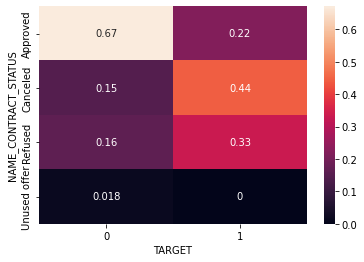

In [ ]:
sns.heatmap(pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['TARGET'], normalize='columns'), annot=True)

In [ ]:
pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['NAME_INCOME_TYPE'], normalize="columns")
#For students, there are high chances of approval.

NAME_INCOME_TYPE,Commercial associate,Pensioner,State servant,Working
NAME_CONTRACT_STATUS,,,,
Approved,0.634146,0.542857,0.466667,0.727273
Canceled,0.121951,0.400000,0.133333,0.090909
Refused,0.219512,0.057143,0.400000,0.159091
Unused offer,0.024390,0.000000,0.000000,0.022727


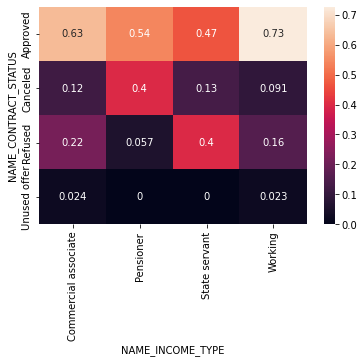

In [ ]:
sns.heatmap(pd.crosstab(merged['NAME_CONTRACT_STATUS'], merged['NAME_INCOME_TYPE'], normalize='columns'), annot=True)